In [120]:
import numpy.random as rd
import pandas as pd
import numpy as np
from numpy.random import seed

In [121]:
number_of_sections = 5
weighing_section = 1/number_of_sections
steps = 0.005
penalties_sections_0p5 = {0.98: 2500,
                 0.95: 5000}

penalties_full_0p5 = {0.98: 12500,
                 0.95: 25000}

In [122]:
mean_availability = 0.975
std_availability = 0.02

In [123]:
def calculate_penalty(availability, steps, penalties):
  penalty_dict = penalties.copy()
  availability_reference = availability
  penalty = 0
  while availability_reference < max(penalty_dict):
    filtered_dict = {k: v for k, v in penalties.items() if k > availability_reference}
    min_availability_of_dict = min(filtered_dict)
    penalty += np.floor((min_availability_of_dict - availability_reference)/steps) * filtered_dict[min_availability_of_dict]
    availability_reference = min_availability_of_dict
  return penalty

In [124]:
df_penalties = pd.DataFrame()

number_of_iterations = 1000
number_of_months = 12

seed_start = 999

for i in range(number_of_iterations):
  penalty_section = 0
  penalty_system = 0
  for m in range(number_of_months):
    availability_system = 0
    for s in range(number_of_sections):
      seed_start += i+m+s
      seed(seed_start)
      availability_section = rd.normal(mean_availability, std_availability)
      availability_system += weighing_section*availability_section
      penalty_section += calculate_penalty(availability_section, steps, penalties_sections_0p5)
    penalty_system += calculate_penalty(availability_system, steps, penalties_full_0p5)
  sr_pen = pd.Series({'Iteration': i,
              'Penalty_section': penalty_section,
              'Penalty_system': penalty_system})
  df_penalties = pd.concat([df_penalties, sr_pen.to_frame().T], ignore_index=True)

In [125]:
df_penalties['Pen_increase'] = df_penalties.Penalty_section / df_penalties.Penalty_system - 1

In [127]:
df_penalties

,Iteration,Penalty_section,Penalty_system,Pen_increase
0,0.0,267500.0,87500.0,2.057143
1,1.0,275000.0,112500.0,1.444444
2,2.0,255000.0,162500.0,0.569231
3,3.0,272500.0,137500.0,0.981818
4,4.0,237500.0,100000.0,1.375000
...,...,...,...,...
995,995.0,342500.0,162500.0,1.107692
996,996.0,287500.0,125000.0,1.300000
997,997.0,277500.0,137500.0,1.018182
998,998.0,230000.0,112500.0,1.044444


(array([807., 165.,  15.,   8.,   2.,   1.,   0.,   0.,   1.,   1.]),
 array([ 0.26666667,  1.62      ,  2.97333333,  4.32666667,  5.68      ,
         7.03333333,  8.38666667,  9.74      , 11.09333333, 12.44666667,
        13.8       ]),
 <BarContainer object of 10 artists>)

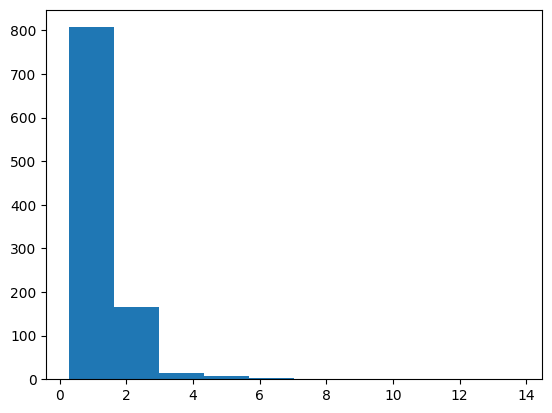

In [126]:
import matplotlib.pyplot as plt
plt.hist(df_penalties['Pen_increase'])